In [2]:
import numpy as np
import pandas as pd
from graphmodels.graphmodel import GraphModel
from graphmodels.utils import parse_parameter_json

In [24]:
parameters = parse_parameter_json("models/Hermen/LandUse_parameters.json")

# TDFI model

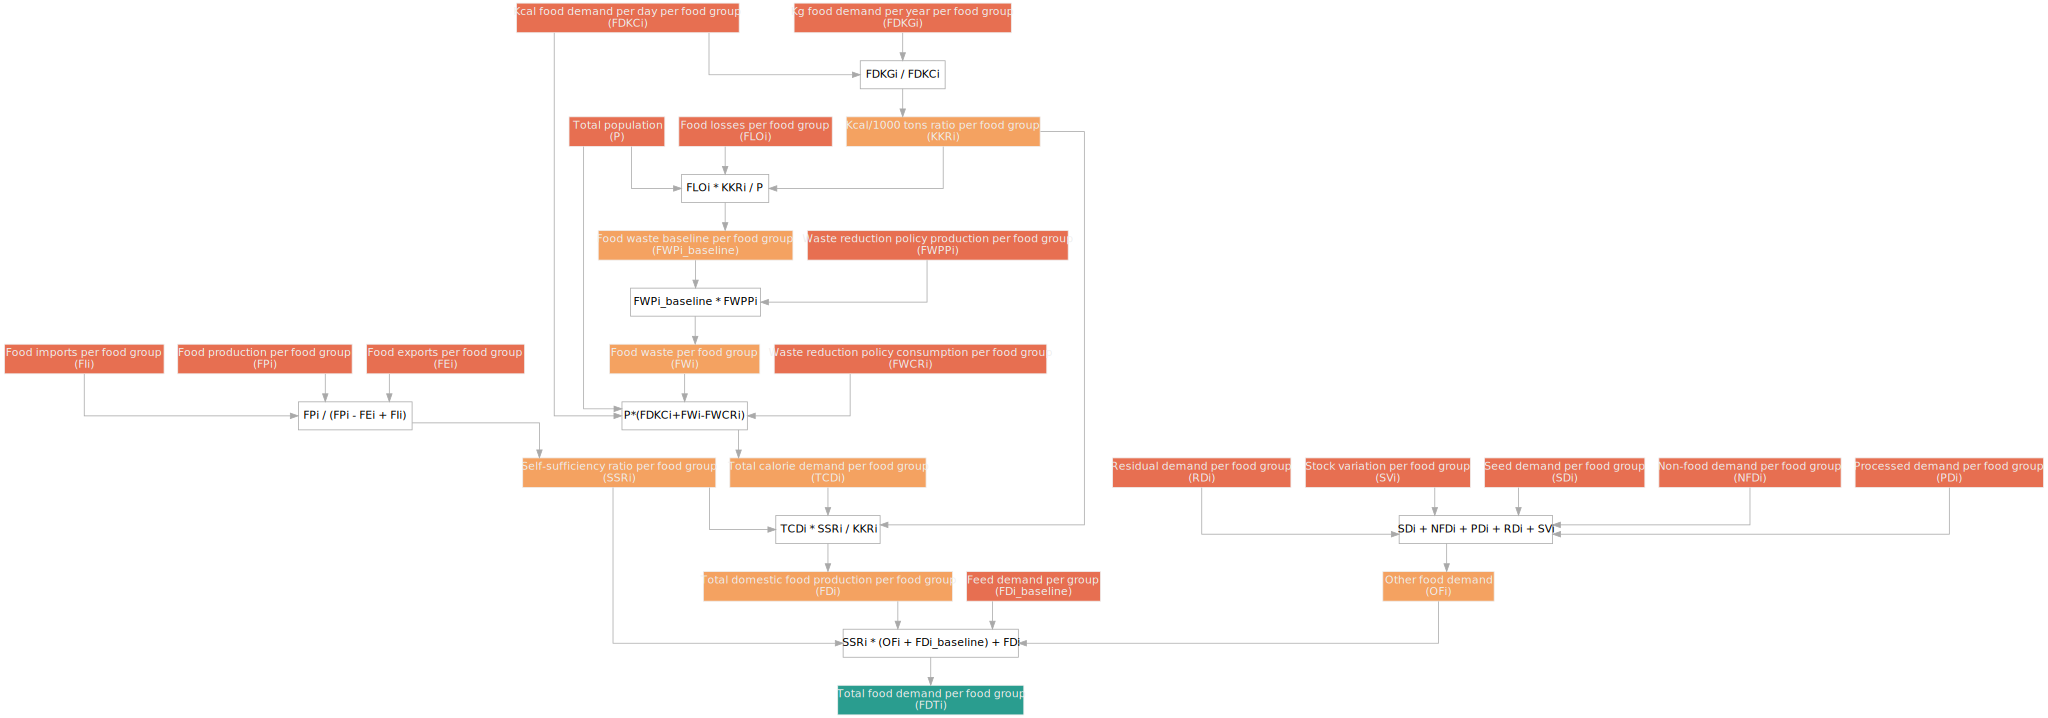

In [25]:
TFDi_nodes = [
    {'type': 'variable',
     'unit': 'kcal/day',
     'id': 'TCDi',
     'name': 'Total calorie demand per food group',
     'in': ['P', 'FWi', 'FWCRi', 'FDKCi'],
     'computation': {'name': 'P*(FDKCi+FWi-FWCRi)',
                     'formula': lambda X: X['P'] * (X['FDKCi'] + X['FWi'] - X['FWCRi'])}
     },
    {'type': 'input',
     'unit': 'kcal/cap/day',
     'id': 'FWCRi',
     'name': 'Waste reduction policy consumption per food group',
     },
    {'type': 'input',
     'id': 'FWPPi',
     'unit': '%',
     'name': 'Waste reduction policy production per food group',
     },
    {'type': 'variable',
     'unit': 'kcal/cap/day',
     'id': 'FWi',
     'name': 'Food waste per food group',
     'in': ['FWPi_baseline', 'FWPPi'],
     'computation': {'name': 'FWPi_baseline * FWPPi',
                     'formula': lambda X: X['FWPi_baseline'] * X['FWPPi'] * 1e-2}
     },
    {'type': 'variable',
     'unit': 'kcal/cap/day',
     'id': 'FWPi_baseline',
     'name': 'Food waste baseline per food group',
     'in': ['FLOi', 'P', 'KKRi'],
     'computation': {'name': 'FLOi * KKRi / P',
                     'formula': lambda X: X['FLOi'] * X['KKRi'] / X['P'] }
     },
    {'type': 'input',
     'unit': 'x 1000 t',
     'id': 'FLOi',
     'name': 'Food losses per food group',
     },
    {'type': 'variable',
     'id': 'KKRi',
     'name': 'Kcal/1000 tons ratio per food group',
     'unit': 'Kcal/kg',
     'in': ['FDKGi', 'FDKCi'],
     'computation': {'name': 'FDKGi / FDKCi',
                     'formula': lambda X:  X['FDKCi'] / (X['FDKGi'] * 1e-6)}
     },
    {'type': 'input',
     'unit': 'kg/capita/yr',
     'id': 'FDKGi',
     'name': 'Kg food demand per year per food group',
     },
    {'type': 'input',
     'unit': 'kcal/capita/day',
     'id': 'FDKCi',
     'name': 'Kcal food demand per day per food group',
     },
    {'type': 'input',
     'unit': 'capita',
     'id': 'P',
     'name': 'Total population',
     },
    {'type': 'variable',
     'unit': '%',
     'id': 'SSRi',
     'name': 'Self-sufficiency ratio per food group',
     'in': ['FPi', 'FEi', 'FIi'],
     'computation': {'name': 'FPi / (FPi - FEi + FIi)',
                     'formula': lambda X: X['FPi'] / (X['FPi'] - X['FEi'] + X['FIi'])}
     },
    {'type': 'input',
     'unit': '1000 t',
     'id': 'FPi',
     'name': 'Food production per food group',
     },
    {'type': 'input',
     'unit': '1000 t',
     'id': 'FEi',
     'name': 'Food exports per food group',
     },

    {'type': 'input',
     'unit': '1000 t',
     'id': 'FIi',
     'name': 'Food imports per food group',
     },

    {'type': 'variable',
     'unit': '1000 t',
     'id': 'FDi',
     'name': 'Total domestic food production per food group',
     'in': ['KKRi', 'SSRi', 'TCDi'],
     'computation': {'name': 'TCDi * SSRi / KKRi',
                     'formula': lambda X: X['TCDi'] * X['SSRi'] / X['KKRi']}


     },
    {'type': 'input',
     'unit': '1000 t',
     'id': 'FDi_baseline',
     'name': 'Feed demand per group',

     },
    {'type': 'variable',
     'unit': '1000 t',
     'id': 'OFi',
     'name': 'Other food demand',
     'in': ['SDi', 'NFDi', 'PDi', 'RDi', 'SVi'],
     'computation': {'name': 'SDi + NFDi + PDi + RDi + SVi',
                     'formula': lambda X: X['SDi'] + X['NFDi'] + X['PDi'] + X['RDi'] + X['SVi']}
     },
    {'type': 'input',
     'unit': '1000 t',
     'id': 'SDi',
     'name': 'Seed demand per food group',
     },
    {'type': 'input',
     'unit': '1000 t',
     'id': 'NFDi',
     'name': 'Non-food demand per food group',
     },
    {'type': 'input',
     'unit': '1000 t',
     'id': 'PDi',
     'name': 'Processed demand per food group',
     },
    {'type': 'input',
     'unit': '1000 t',
     'id': 'RDi',
     'name': 'Residual demand per food group',
     },
    {'type': 'input',
     'unit': '1000 t',
     'id': 'SVi',
     'name': 'Stock variation per food group',
     },
    {'type': 'output',
     'id': 'FDTi',
     'name': 'Total food demand per food group',
     'unit': 'x 1000 tonne',
     'in': ['FDi', 'OFi', 'FDi_baseline', 'SSRi'],
     'computation': {'name': 'SSRi * (OFi + FDi_baseline) + FDi',
                     'formula': lambda X: X['SSRi'] * (X['OFi'] + X['FDi_baseline']) + X['FDi']}
     },
]

TDFi_model = GraphModel(TFDi_nodes)
TDFi_model.draw()

# FDI_crop model

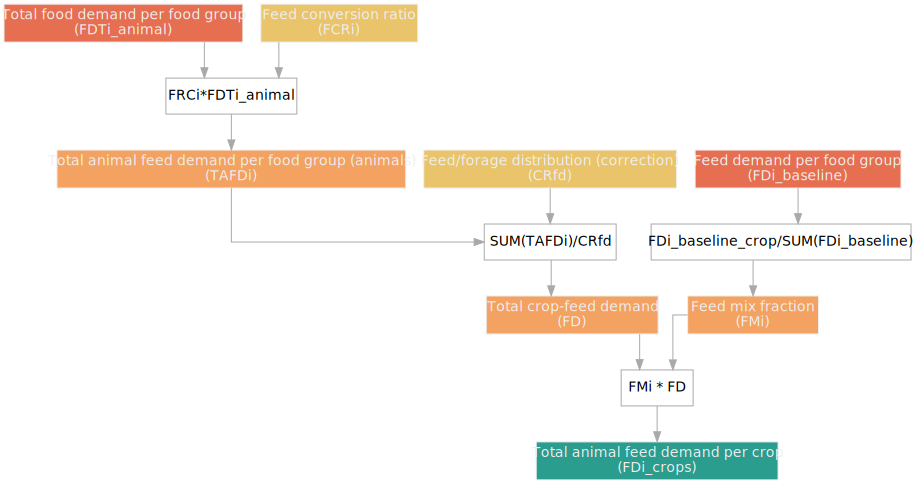

In [26]:
#the last value of this vector, 'meat, other' is the weighted average of all other meat types (resp. goat, horse, rabbit, sheep) using yields + animals in production for the year 2017 -> this is done within the excel file


AYi = ['Bovine meat', 'Pigmeat', 'Poultry meat',
                     'Eggs', 'Milk - Excluding Butter', 'Meat, other']

FDi = ['Cereals - Excluding Beer', 'Starchy Roots', 'Sugar Crops', 'Sugar & Sweeteners','Pulses',
       'Treenuts', 'Oilcrops', 'Vegetable Oils', 'Vegetables', 'Fruits - Excluding Wine',
       'Stimulants', 'Spices', 'Alcoholic Beverages', 'Bovine meat', 'Mutton & Goat meat',
       'Pigmeat', 'Poultry meat', 'Meat, other', 'Offals', 'Animal fats',
       'Eggs', 'Milk - Excluding Butter', 'Fish, Seafood', 'Aquatic Products, Other', 'Miscellaneous']

FDTi = ['Cereals - Excluding Beer', 'Starchy Roots', 'Sugar Crops', 'Sugar & Sweeteners','Pulses',
       'Treenuts', 'Oilcrops', 'Vegetable Oils', 'Vegetables', 'Fruits - Excluding Wine',
       'Stimulants', 'Spices', 'Alcoholic Beverages', 'Bovine meat', 'Mutton & Goat meat',
       'Pigmeat', 'Poultry meat', 'Meat, other', 'Offals', 'Animal fats',
       'Eggs', 'Milk - Excluding Butter', 'Fish, Seafood', 'Aquatic Products, Other', 'Miscellaneous']

Crop_group = ['Cereals - Excluding Beer', 'Starchy Roots', 'Sugar Crops', 'Sugar & Sweeteners','Pulses',
              'Treenuts', 'Oilcrops', 'Vegetable Oils', 'Vegetables', 'Fruits - Excluding Wine',
              'Stimulants', 'Spices', 'Alcoholic Beverages']

#Animal products taken from the vector 'FDi'. 'Meat, other' and 'Mutton & Goat meat' should be aggregated. Not sure if the last part works with loc
Animal_group = ['Bovine meat', 'Pigmeat','Poultry meat', 'Eggs', 'Milk - Excluding Butter', ('Meat, other' + 'Mutton & Goat meat')]


FDi_nodes = [
    # FDTi from the previous function
    {'type': 'input',
     'unit': '1000 t',
     'id': 'FDTi_animal',
     'name': 'Total food demand per food group',

     },
    {'type': 'output',
     'unit': '1000 t',
     'id': 'FDi_crops',
     'name': 'Total animal feed demand per crop',
     'in': ['FMi', 'FD'],
     'computation': {'name': 'FMi * FD',
                     'formula': lambda X: X['FMi'] * X['FD']}
     },
    # Note1: The vector 'FMi' might contain animal-based feed (i.e. Milk) which caused a cycle error in my previous model; so we want to select only crops from the vector FMI
    {'type': 'variable',
     'unit': '',
     'id': 'FMi',
     'name': 'Feed mix fraction',
     'in': ['FDi_baseline'],
     'computation': {'name': 'FDi_baseline_crop/SUM(FDi_baseline)',
                     'formula': lambda X: X['FDi_baseline'].loc[Crop_group]/X['FDi_baseline'].sum()}
     },
    {'type': 'input',
     'unit': '1000 t',
     'id': 'FDi_baseline',
     'name': 'Feed demand per food group',
     },
    # Note2: the CRfd is calculated for the year 2017; and assumed constant. For hungary the value of CRfd is: 1.58729526339088
    {'type': 'variable',
     'unit': '1ooo t',
     'id': 'FD',
     'name': 'Total crop-feed demand',
     'in': ['TAFDi', 'CRfd'],
     'computation': {'name': 'SUM(TAFDi)/CRfd',
                     'formula': lambda X: X['TAFDi'].sum()/X['CRfd']}
     },

    # CRfd is calculated with model data from  & assumed constant for simulated years (for now)
    {'type': 'parameter',
     'unit': '',
     'id': 'CRfd',
     'name': 'Feed/forage distribution (correction)',
     },

    {'type': 'parameter',
     'unit': 'kg DM feed/ kg EW',
     'id': 'FCRi',
     'name': 'Feed conversion ratio',
     },
    {'type': 'variable',
     'unit': 'kg',
     'id': 'TAFDi',
     'name': 'Total animal feed demand per food group (animals)',
     'in': ['FCRi', 'FDTi_animal'],
     'computation': {'name': 'FRCi*FDTi_animal',
                     'formula': lambda X: (X['FCRi'] * X['FDTi_animal'])}
     }
]


FDi_crops_Model = GraphModel(FDi_nodes)

FDi_crops_Model.draw()

# CRfd model

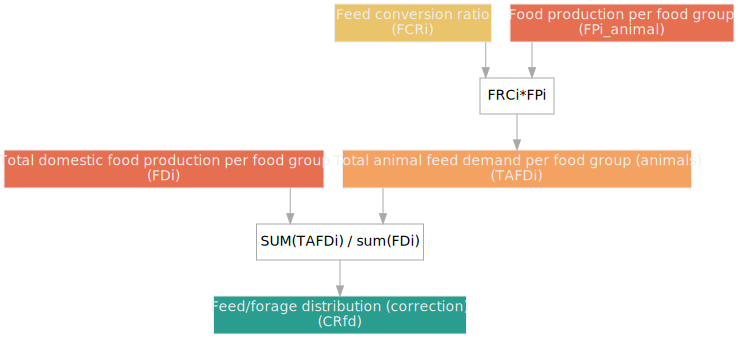

In [27]:
#Update Hermen - CRfd

#this is the selection of animal products from the production vector
Animal_group = ['Bovine meat', 'Pigmeat', 'Poultry meat', 'Eggs', 'Milk - Excluding Butter', 'Meat, other']

CRfd_nodes = [
    {'type': 'output',
     'unit': '',
     'id': 'CRfd',
     'name': 'Feed/forage distribution (correction)',
     'in': ['TAFDi', 'FDi'],
     'computation': {'name': 'SUM(TAFDi) / sum(FDi)',
                     'formula': lambda X: X['TAFDi'].sum() / X['FDi'].sum()}
     },
    {'type': 'input',
     'unit': '1000 t',
     'id': 'FDi',
     'name': 'Total domestic food production per food group',
     },
    # This computation uses the 2017 'FPi' value to calculate the 'TAFDi2017_cal' instead of the whole food demand computation for 2017.
    {'type': 'variable',
     'unit': 'kg',
     'id': 'TAFDi',
     'name': 'Total animal feed demand per food group (animals)',
     'in': ['FCRi', 'FPi_animal'],
     'computation': {'name': 'FRCi*FPi',
                     'formula': lambda X: X['FCRi'] * X['FPi_animal']}
     },
    {'type': 'parameter',
     'unit': 'kg DM feed/ kg EW',
     'id': 'FCRi',
     'name': 'Feed conversion ratio',
     },
    {'type': 'input',
     'unit': '1000 t',
     'id': 'FPi_animal',
     'name': 'Food production per food group',
     },
]


CRfd_model = GraphModel(CRfd_nodes)

CRfd_model.draw()

# CD corr 

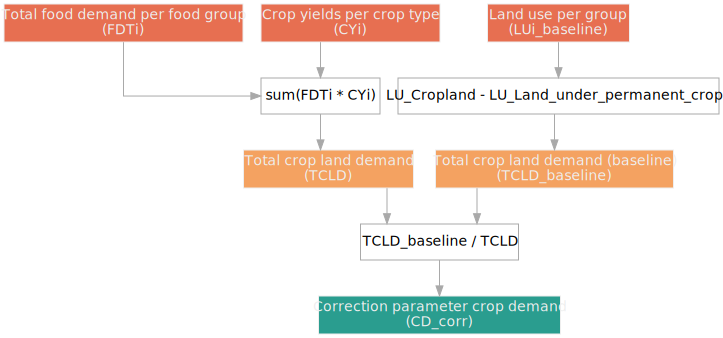

In [28]:
CD_corr_nodes = [
    {'type': 'input',
     'unit': '1000 tons',
     'id': 'FDTi',
     'name': 'Total food demand per food group',
     },
    {'type': 'input',
     'unit': 'hg/ha',
     'id': 'CYi',
     'name': 'Crop yields per crop type'},
    {'type': 'variable',
     'unit': '',
     'id': 'TCLD',
     'name': 'Total crop land demand',
     'in': ['FDTi', 'CYi'],
     'computation':{'name': 'sum(FDTi * CYi)', 'formula': lambda X: 1e4 * (X['FDTi'] / X['CYi']).sum()}
    },
    {'type': 'input',
     'unit': '1000 ha',
     'id': 'LUi_baseline',
     'name': 'Land use per group'
    },
    {'type': 'variable',
     'unit': 'ha',
     'id': 'TCLD_baseline',
     'name': 'Total crop land demand (baseline)',
     'in': ['LUi_baseline'],
     'computation': {'name': 'LU_Cropland - LU_Land_under_permanent_crops',
                     'formula': lambda X: X['LUi'].loc['Cropland'] - X['LUi'].loc['Land under permanent crops']}
    },
    {'type': 'output',
     'unit': '',
     'id': 'CD_corr',
     'name': 'Correction parameter crop demand',
     'in': ['TCLD', 'TCLD_baseline'],
     'computation': {'name': 'TCLD_baseline / TCLD',
                     'formula': lambda X: X['TCLD_baseline'] / X['TCLD']}
    },
]

CD_corr_model = GraphModel(CD_corr_nodes)

plot = CD_corr_model.draw()

plot

# Full model

In [30]:
full_FDTi_CD_corr_nodes = [
    {
        'id': 'inputs_animal_and_crops',
        'name': 'All inputs (animals and crops)',
        'unit':'',
        'type':'input',
    },
    {
        'id': 'FDTi_animal',
        'name': 'Total food demand per food group (animals)',
        'unit':'',
        'type':'variable',
        'in': ['inputs_animal_and_crops'],
        'computation': {'name': 'compute FDTi_animal', 'formula': lambda X: compute_FDTi_animal(X) }
    },
    {
        'id': 'FDi_crops',
        'name': 'Total domestic food production per food group (crops)',
        'unit':'',
        'type':'variable',
        'in': ['inputs_animal_and_crops', 'FDTi_animal', 'CRfd'],
        'computation': {'name': 'compute FDi_crops', 'formula': lambda X: compute_FDi_crops(X) }
    },
    {
        'id': 'FDTi_crops',
        'name': 'Total food demand per food group (crops)',
        'unit':'',
        'type':'variable',
        'in': ['inputs_animal_and_crops', 'FDi_crops'],
        'computation': {'name': 'compute FDTi_crops', 'formula': lambda X: compute_FDTi_crops(X) }
    },
    {
        'id': 'FDTi',
        'name': 'Total food demand per food group',
        'unit':'',
        'type':'output',
        'in': ['FDTi_animal', 'FDTi_crops'],
        'computation': {'name': 'concatenate FDTi_crops and FDTi_animal', 'formula': lambda X: pd.concat([X['FDTi_animal'], X['FDTi_crops']]) }
    },
    {
        'id': 'CRfd',
        'name': 'Feed/forage distribution (correction)',
        'unit':'',
        'type':'variable',
        'in': ['FCRi', 'inputs_animal_and_crops'],
        'computation': {'name': 'compute CRfd', 'formula': lambda X: compute_CRfd(X) }
    },
    {
        'id': 'FCRi',
        'name': 'Feed conversion ratio',
        'unit': '',
        'type': 'parameter',
    },
    {
        'id': 'CD_corr',
        'name': 'Correction parameter crop demand',
        'unit':'',
        'type':'output',
        'in': ['FDTi', 'inputs_animal_and_crops'],
        'computation': {'name': 'compute CRfd', 'formula': lambda X: compute_CD_corr(X) }
    },

]

Animal_group = ['Bovine meat', 'Pigmeat','Poultry meat', 'Eggs', 'Milk - Excluding Butter', 'Meat, other']

Crop_group = ['Cereals - Excluding Beer', 'Starchy Roots', 'Sugar Crops',
              'Sugar & Sweeteners','Pulses', 'Treenuts', 'Oilcrops',
              'Vegetable Oils', 'Vegetables', 'Fruits - Excluding Wine',
              'Stimulants', 'Spices', 'Alcoholic Beverages']


def compute_CRfd(X):
    X = X.copy()
    X['FPi_animal'] = X['FPi'].loc[Animal_group]
    result = CRfd_model.run(X)

    return result['CRfd']

def compute_FDTi_animal(X):
    X = X.copy()
    X['FDi_baseline'] = X['FDi']
    result = TDFi_model.run(X)['FDTi']
    return result.loc[Animal_group]


def compute_FDTi_crops(X):
    X = X.copy()
    X['FDi_baseline'] = X['FDi']
    result = TDFi_model.run(X)['FDTi']
    return result.loc[Crop_group]


def compute_FDi_crops(X):
    X = X.copy()
    X['FDi_baseline'] = X['FDi']
    result = FDi_crops_Model.run(X)['FDi_crops']
    return result

def compute_CD_corr(X):
    X = X.copy()
    X['LUi_baseline'] = X['LUi'] 
    result = CD_corr_model.run(X)['CD_corr']
    return result


GraphModel(full_FDTi_CD_corr_nodes).draw()
res = GraphModel(full_FDTi_CD_corr_nodes).run(parameters)#['CRfd']

In [31]:
# abs(ref - res['FDTi']) / ref

# ref = np.array([ 1.40259255e+04,  4.02989691e+02,  1.01665765e+03,  7.31677452e+02,
#                 5.14729784e+01,  9.44870032e+00,  2.95845713e+03,  8.53409589e+02,
#                 1.45993619e+03,  1.13199850e+03,  0.00000000e+00,  3.17356547e+01,
#                 1.40882925e+03,  3.05619177e+01,  1.36217508e+00,  4.69758726e+02,
#                 4.92815815e+02,  6.48632040e+00,  3.70000000e+01,  1.49064665e+02,
#         1.37567189e+02,  1.92270198e+03,  2.41006914e+01,  0.00000000e+00,
#        -0.00000000e+00])
# index = ['Cereals - Excluding Beer', 'Starchy Roots', 'Sugar Crops', 'Sugar & Sweeteners','Pulses',
#        'Treenuts', 'Oilcrops', 'Vegetable Oils', 'Vegetables', 'Fruits - Excluding Wine',
#        'Stimulants', 'Spices', 'Alcoholic Beverages', 'Bovine meat', 'Mutton & Goat meat',
#        'Pigmeat', 'Poultry meat', 'Meat, other', 'Offals', 'Animal fats',
#        'Eggs', 'Milk - Excluding Butter', 'Fish, Seafood', 'Aquatic Products, Other', 'Miscellaneous']
# ref = pd.Series(ref, index=index)

# chCL model 

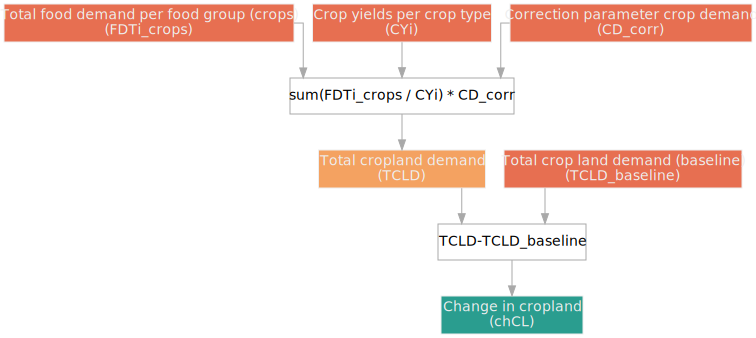

In [32]:

# this crop group excludes the 'processed' foods: 'Sugar & Sweeteners', 'Vegetable Oils', 'Stimulants', 'Spices', 'Alcoholic Beverages' for now
# in my model 'fibre crops' is added as a constant variable (based on 2017 land use data), as it's not in the food-demand vector we need to add it manually
#'Fibre Crops Primary'
Crop_group2 = ['Cereals - Excluding Beer', 'Fruits - Excluding Wine', 'Oilcrops',
               'Pulses', 'Starchy Roots', 'Sugar Crops', 'Treenuts', 'Vegetables']

chCL_nodes = [

    # this is the value that is computed with the addition of animal feed (so the CRfd part)
    {'type': 'input',
     'id': 'FDTi_crops',
     'name': 'Total food demand per food group (crops)',
     'unit': 'x 1000 tonne',
     },
    {'type': 'input',
     'unit': 'hg/ha',
     'id': 'CYi',
     'name': 'Crop yields per crop type',
     },
    # this was TCL2017i
    {'type': 'input',
     'unit': 'ha',
     'id': 'TCLD_baseline',
     'name': 'Total crop land demand (baseline)',
     },
    {'type': 'input',
     'unit': 'ha',
     'id': 'CD_corr',
     'name': 'Correction parameter crop demand',
     },
    {'type': 'variable',
     'id': 'TCLD',
     'name': 'Total cropland demand',
     'unit': 'x 1000ha',
     'in': ['FDTi_crops', 'CYi', 'CD_corr'],
     'computation': {'name': 'sum(FDTi_crops / CYi) * CD_corr',
                     'formula': lambda X: (X['FDTi_crops']/X['CYi']).sum() * X['CD_corr'] * 1e4}
     },
    {'type': 'output',
     'id': 'chCL',
     'name': 'Change in cropland',
     'unit': 'x 1000ha',
     'in': ['TCLD', 'TCLD_baseline'],
     'computation': {'name': 'TCLD-TCLD_baseline',
                     'formula': lambda X: (X['TCLD'] - X['TCLD_baseline'])}
     }
]

chCL_model = GraphModel(chCL_nodes)

chCL_model.draw()


In [33]:
X = {
    'CD_corr': 1.16,
    'FDTi_crops':res['FDTi_crops'],
    'TCLD_baseline': parameters['LUi'].loc['Cropland'] - parameters['LUi'].loc['Land under permanent crops'],
    'CYi': parameters['CYi']
    
}

chCL_model.run(X)

{'CD_corr': 1.16,
 'FDTi_crops': Cereals - Excluding Beer    14032.845229
 Starchy Roots                 402.994958
 Sugar Crops                          NaN
 Sugar & Sweeteners            731.678633
 Pulses                         51.476479
 Treenuts                        9.448700
 Oilcrops                     2958.549123
 Vegetable Oils                853.409589
 Vegetables                   1460.051501
 Fruits - Excluding Wine      1132.000319
 Stimulants                      0.000000
 Spices                         31.735655
 Alcoholic Beverages          1408.829252
 dtype: float64,
 'TCLD_baseline': 4323.0,
 'CYi': Cereals - Excluding Beer     58355
 Fruits - Excluding Wine      93057
 Oilcrops                     28497
 Pulses                       25375
 Starchy Roots               246182
 Sugar Crops                 674754
 Treenuts                     14246
 Vegetables                  165618
 Fibre Crops Primary          11977
 dtype: int64,
 'TCLD': 4287.390656273896,
 'chC

# Land use model

In [34]:
# Original

BE2_nodes = [
    {'type': 'input',
     'unit': '1000 ha',
     'id': 'LUi',
     'name': 'vector land use',
     },

    # from previous part
    {'type': 'variable',
     'id': 'chCL',
     'name': 'Change in cropland',
     'unit': 'x 1000ha'
     },

    {'type': 'variable',
     'id': 'TCropDi_sum',
     'name': 'Sum total cropland demand',
     'unit': 'x 1000ha'
     },
    # for the land stocks you start with the baseline & for each iteration the old value should be stored. So for the next iteration in t+2, this updated land-stocks from t+1 are used
    # After the new land use distribution these values should be updated:
    # IL_stock_newRF --> IL_stock
    # FL_stock_newRF --> FL_stock
    # CL_stock_new--> CL_stock

    {'type': 'input',
     'unit': 'x1000 ha',
     'id': 'CL_stock',
     'name': 'Cropland t-1',
     },
    {'type': 'input',
     'unit': 'x1000 ha',
     'id': 'IL_stock',
     'name': 'Fallow land t-1',
     },
    {'type': 'input',
     'unit': 'x1000 ha',
     'id': 'FL_stock',
     'name': 'Forest land t-1',
     },
    {'type': 'variable',
     'id': 'CL_stock_new',
     'name': 'Cropland stock',
     'unit': 'x 1000ha',
     'in': ['chCL', 'CL_stock'],
     'computation': {'name': 'CL_stock + chCL',
                     'formula': lambda X: CL(X['chCL'], X['CL_stock'])}
     },
    {'type': 'variable',
     'id': 'IL_stock_new',
     'name': 'Inactive/fallow land stock',
     'unit': 'x 1000 ha',
     'in': ['chCL', 'IL_stock'],
     'computation': {'name': 'f(chCL, CL_stock) ',
                     'formula': lambda X: IL(X['chCL'], X['IL_stock'])}
     },
    {'type': 'variable',
     'id': 'FL_stock_new',
     'name': 'Forest land stock',
     'unit': 'x 1000ha',
     'in': ['chCL', 'FL_stock', 'IL_stock_new'],
     'computation': {'name': 'f(chCL, FL_stock, IL_stock_new)',
                     'formula': lambda X: FL(X['chCL'], X['FL_stock'], X['IL_stock_new'])}
     },
    {'type': 'parameter',
     'unit': '%',
     'id': 'R_rate',
     'name': 'Rate of reforestation',
     },
    {'type': 'variable',
     'id': 'RF_land',
     'name': 'Reforestation of land',
     'unit': 'x 1000ha',
     'in': ['R_rate', 'IL_stock_new'],
     'computation': {'name': 'R_rate*IL_stock_new',
                     'formula': lambda X: X['R_rate']*1e-2*X['IL_stock_new']}
     },
    {'type': 'variable',
     'id': 'FL_stock_new_RF',
     'name': 'New forest land stock after reforestation policy',
     'unit': 'x 1000ha',
     'in': ['RF_land', 'FL_stock_new'],
     'computation': {'name': 'FL_stock_new+RF_land',
                     'formula': lambda X: X['FL_stock_new']+X['RF_land']}
     },
    {'type': 'variable',
     'id': 'IL_stock_new_RF',
     'name': 'New fallow/inactive land stock after reforestation policy',
     'unit': 'x 1000ha',
     'in': ['RF_land', 'IL_stock_new'],
     'computation': {'name': 'IL_stock_new-RF_land',
                     'formula': lambda X: X['IL_stock_new'] - X['RF_land']}
     },
    {'type': 'input',
     'unit': '1000 ha',
     'id': 'TLA',
     'name': 'Total land area',
     'in': ['LUi'],
     'computation': {'name': 'Select',
                     'formula': lambda X: X['LUi'].loc['Land area']}
     },
    {'type': 'input',
     'unit': '1000 ha',
     'id': 'TFA2017',
     'name': 'Forest land area (2017)',
     'in': ['LUi'],
     'computation': {'name': 'Select',
                     'formula': lambda X: X['LUi'].loc['Forest land']}
     },
    {'type': 'output',
     'id': 'BE2',
     'name': 'Share of forest area to total land area',
     'unit': '%',
     'in': ['TLA', 'FL_stock_new_RF'],
     'computation': {'name': '100*(FL_stock_new_RF / TLA)',
                     'formula': lambda X:  100 * (X['FL_stock_new_RF']) / X['TLA']}
     },
    # Used in fertilizer computation -> as FAO nutrient balance uses the total cropland including permanent + fallow lands for fertilizer; LUi['land under permanent crops'] is added again; assumed constant)
    {'type': 'output',
     'id': 'TOT_CL_NEW',
     'name': 'Total new cropland (including perm. and fallow land)',
     'unit': 'x 1000ha',
     'in': ['TCropDi_sum', 'chCL', 'LUi', 'FL_stock', 'FL_stock_new'],
     'computation': {'name': 'TCropDi_sum+chCL+CL_perm+(IL_stock-IL_stock_new)',
                     'formula': lambda X: (X['TCropDi_sum']-X['chCL']+X['LUi'].loc['Land under permanent crops']+(X['IL_stock']-X['IL_stock_new']))}
     },


]


def CL(chCL, CL_stock):
    return chCL + CL_stock


def FL(chCL, FL_stock, IL_stock):
    if (chCL > 0) and (IL_stock - chCL < 0):
        return FL_stock + IL_stock - chCL
    else:
        return FL_stock


def IL(chCL, IL_stock):
    if (chCL > 0) and (IL_stock - chCL < 0):
        return 0
    else:
        return IL_stock - chCL


model_BE2 = GraphModel(BE2_nodes)

#model_BE2.draw()


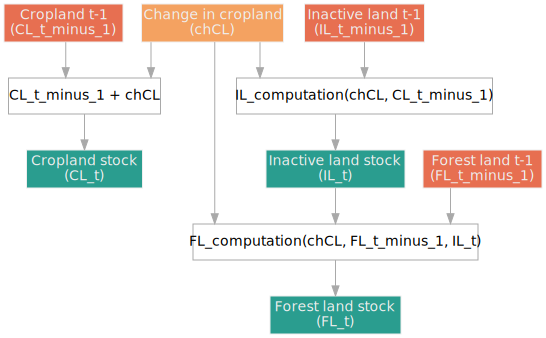

In [35]:
# Refactored

CH_IL_FL_nodes = [
    # from previous part
    {'type': 'variable',
     'id': 'chCL',
     'name': 'Change in cropland',
     'unit': 'x 1000ha'
     },
    {'type': 'input',
     'unit': 'x1000 ha',
     'id': 'CL_t_minus_1',
     'name': 'Cropland t-1',
     },
    {'type': 'input',
     'unit': 'x1000 ha',
     'id': 'IL_t_minus_1',
     'name': 'Inactive land t-1',
     },
    {'type': 'input',
     'unit': 'x1000 ha',
     'id': 'FL_t_minus_1',
     'name': 'Forest land t-1',
     },
    {'type': 'output',
     'id': 'CL_t',
     'name': 'Cropland stock',
     'unit': 'x 1000ha',
     'in': ['chCL', 'CL_t_minus_1'],
     'computation': {'name': 'CL_t_minus_1 + chCL',
                     'formula': lambda X: X['chCL'] +  X['CL_t_minus_1']}
     },
    {'type': 'output',
     'id': 'IL_t',
     'name': 'Inactive land stock',
     'unit': 'x 1000 ha',
     'in': ['chCL', 'IL_t_minus_1'],
     'computation': {'name': 'IL_computation(chCL, CL_t_minus_1) ',
                     'formula': lambda X: IL(X['chCL'], X['IL_t_minus_1'])}
     },
    {'type': 'output',
     'id': 'FL_t',
     'name': 'Forest land stock',
     'unit': 'x 1000ha',
     'in': ['chCL', 'FL_t_minus_1', 'IL_t'],
     'computation': {'name': 'FL_computation(chCL, FL_t_minus_1, IL_t)',
                     'formula': lambda X: FL(X['chCL'], X['FL_t_minus_1'], X['IL_t'])}
     },

]

def FL(chCL, FL_t_minus_1, IL_t_minus_1):
    if (chCL > 0) and (IL_t_minus_1 - chCL < 0):
        return FL_t_minus_1 + IL_t_minus_1 - chCL
    else:
        return FL_t_minus_1


def IL(chCL, IL_t_minus_1):
    if (chCL > 0) and (IL_t_minus_1 - chCL < 0):
        return 0
    else:
        return IL_t_minus_1 - chCL


model_CH_IL_FL = GraphModel(CH_IL_FL_nodes)

model_CH_IL_FL.draw()


In [36]:
X = {
    'CL_t_minus_1':  4323,
    'IL_t_minus_1': 189,
    'FL_t_minus_1': 2057.27,
    'chCL': -37
    
}

model_CH_IL_FL.run(X)

{'CL_t_minus_1': 4323,
 'IL_t_minus_1': 189,
 'FL_t_minus_1': 2057.27,
 'chCL': -37,
 'IL_t': 226,
 'FL_t': 2057.27,
 'CL_t': 4286}

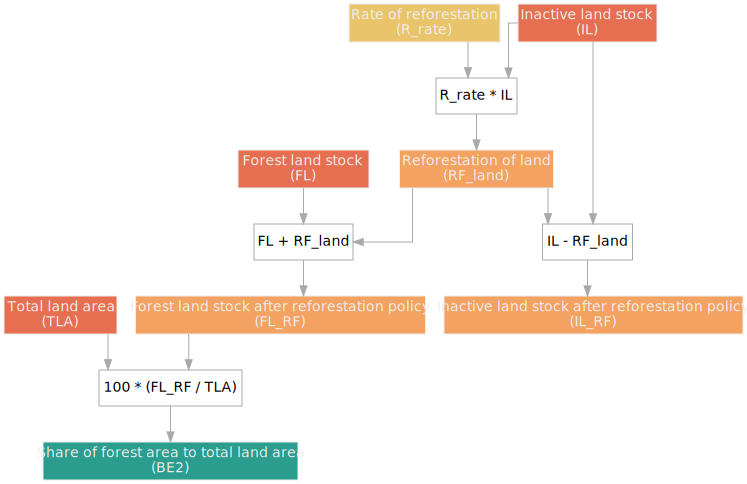

In [37]:
BE2_nodes = [
    {'type': 'input',
     'unit': '1000 ha',
     'id': 'TLA',
     'name': 'Total land area',
     },
    {'type': 'input',
     'unit': '1000 ha',
     'id': 'FL',
     'name': 'Forest land stock',
     },
    {'type': 'input',
     'unit': '1000 ha',
     'id': 'IL',
     'name': 'Inactive land stock',
     },
    {'type': 'parameter',
     'unit': '%',
     'id': 'R_rate',
     'name': 'Rate of reforestation',
     },
    {'type': 'variable',
     'id': 'RF_land',
     'name': 'Reforestation of land',
     'unit': 'x 1000ha',
     'in': ['R_rate', 'IL'],
     'computation': {'name': 'R_rate * IL',
                     'formula': lambda X: X['R_rate'] * 1e-2 * X['IL']}
     },
    {'type': 'variable',
     'id': 'FL_RF',
     'name': 'Forest land stock after reforestation policy',
     'unit': 'x 1000ha',
     'in': ['RF_land', 'FL'],
     'computation': {'name': 'FL + RF_land',
                     'formula': lambda X: X['FL'] + X['RF_land']}
     },
    {'type': 'variable',
     'id': 'IL_RF',
     'name': 'Inactive land stock after reforestation policy',
     'unit': 'x 1000ha',
     'in': ['RF_land', 'IL'],
     'computation': {'name': 'IL - RF_land',
                     'formula': lambda X: X['IL'] - X['RF_land']}
     },
    {'type': 'output',
     'id': 'BE2',
     'name': 'Share of forest area to total land area',
     'unit': '%',
     'in': ['TLA', 'FL_RF'],
     'computation': {'name': '100 * (FL_RF / TLA)',
                     'formula': lambda X:  1e2 * X['FL_RF'] / X['TLA']}
     },

]


model_BE2 = GraphModel(BE2_nodes)

model_BE2.draw()


In [38]:
X = {
    'R_rate': 25,
    'IL': 226,
    'FL': 2057.27,
    'TLA': 9126.0
}

model_BE2.run(X)

{'R_rate': 25,
 'IL': 226,
 'FL': 2057.27,
 'TLA': 9126.0,
 'RF_land': 56.5,
 'IL_RF': 169.5,
 'FL_RF': 2113.77,
 'BE2': 23.1620644312952}

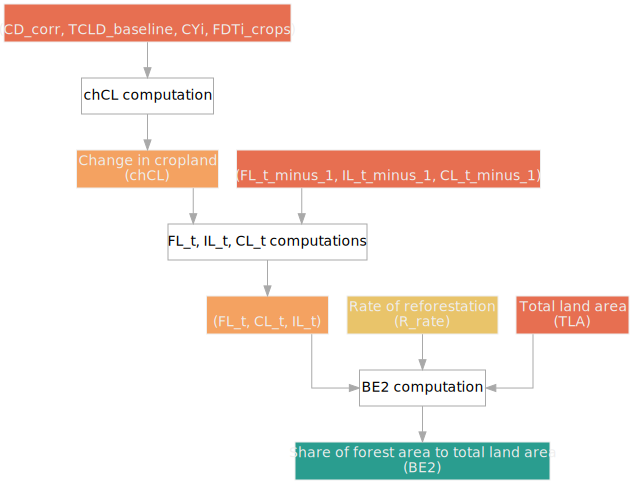

In [39]:
full_BE2_nodes = [

    {'type': 'input',
     'unit': 'ha',
     'id': 'CD_corr, TCLD_baseline, CYi, FDTi_crops',
     'name': '',
     },
    {'type': 'variable',
     'id': 'chCL',
     'name': 'Change in cropland',
     'unit': 'x 1000ha',
     'in': ['CD_corr, TCLD_baseline, CYi, FDTi_crops'],
     'computation': {'name': 'chCL computation',
                     'formula': lambda X: compute_chCL(X)}
     },

    {'type': 'input',
     'unit': '',
     'id': 'FL_t_minus_1, IL_t_minus_1, CL_t_minus_1',
     'name': '',
     },
    {'type': 'variable',
     'id': 'FL_t, CL_t, IL_t',
     'name': '',
     'unit': '',
     'in': ['FL_t_minus_1, IL_t_minus_1, CL_t_minus_1', 'chCL'],
     'computation': {'name': 'FL_t, IL_t, CL_t computations',
                     'formula': lambda X: compute_FL_CL_IL(X)}
     },
    {'type': 'parameter',
     'unit': '%',
     'id': 'R_rate',
     'name': 'Rate of reforestation',
     },
    {'type': 'input',
     'unit': '1000 ha',
     'id': 'TLA',
     'name': 'Total land area',
     },
    {'type': 'output',
     'id': 'BE2',
     'name': 'Share of forest area to total land area',
     'unit': '%',
     'in': ['FL_t, CL_t, IL_t', 'R_rate', 'TLA'],
     'computation': {'name': 'BE2 computation',
                     'formula': lambda X: compute_BE2(X)}
     },
]

def compute_chCL(X):
    res = chCL_model.run(X)
    return res['chCL']

def compute_FL_CL_IL(X):
    res = model_CH_IL_FL.run(X)
    return res['FL_t'], res['CL_t'], res['IL_t']

def compute_BE2(X):
    X['FL'], _, X['IL'] = X['FL_t, CL_t, IL_t']
    res = model_BE2.run(X)
    return res['BE2']


model_full_BE2 = GraphModel(full_BE2_nodes)

model_full_BE2.draw()

In [40]:
X = {
    'CD_corr': 1.16,
    'FDTi_crops':res['FDTi_crops'],
    'TCLD_baseline': parameters['LUi'].loc['Cropland'] - parameters['LUi'].loc['Land under permanent crops'],
    'CYi': parameters['CYi'],
    'R_rate': 25,
    'TLA': 9126.0,
    'CL_t_minus_1':  4323,
    'IL_t_minus_1': 189,
    'FL_t_minus_1': 2057.27,
}


model_full_BE2.run(X)

{'CD_corr': 1.16,
 'FDTi_crops': Cereals - Excluding Beer    14032.845229
 Starchy Roots                 402.994958
 Sugar Crops                          NaN
 Sugar & Sweeteners            731.678633
 Pulses                         51.476479
 Treenuts                        9.448700
 Oilcrops                     2958.549123
 Vegetable Oils                853.409589
 Vegetables                   1460.051501
 Fruits - Excluding Wine      1132.000319
 Stimulants                      0.000000
 Spices                         31.735655
 Alcoholic Beverages          1408.829252
 dtype: float64,
 'TCLD_baseline': 4323.0,
 'CYi': Cereals - Excluding Beer     58355
 Fruits - Excluding Wine      93057
 Oilcrops                     28497
 Pulses                       25375
 Starchy Roots               246182
 Sugar Crops                 674754
 Treenuts                     14246
 Vegetables                  165618
 Fibre Crops Primary          11977
 dtype: int64,
 'R_rate': 25,
 'TLA': 9126.0,
 '

# FE_CO2eq

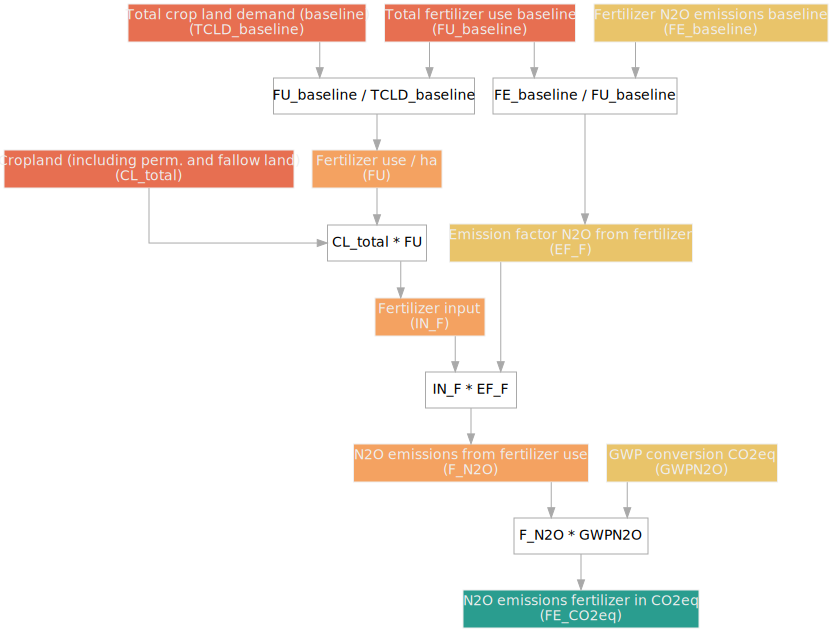

In [19]:
# also finished, but we might be able to simplify this by removing the WC_N2O conversion;

FE_CO2eq_nodes = [
    {'type': 'input',
     'id': 'CL_total',
     'name': 'Cropland (including perm. and fallow land)',
     'unit': 'x 1000ha',
     },
    {'type': 'input',
     'unit': 'ha',
     'id': 'TCLD_baseline',
     'name': 'Total crop land demand (baseline)',
     },
    {'type': 'input',
     'unit': 't',
     'id': 'FU_baseline',
     'name': 'Total fertilizer use baseline',
     },
    # assumed constant based on the year 2017; maybe later we can use weighted average or add a scenario that can change the fertilizer/ha intensity
    {'type': 'variable',
     'unit': 'kg/ha',
     'id': 'FU',
     'name': 'Fertilizer use / ha',
     'in': ['TCLD_baseline', 'FU_baseline'],
     'computation': {'name': 'FU_baseline / TCLD_baseline',
                     'formula': lambda X: X['FU_baseline'] / (X['TCLD_baseline'] * 1e4)}
     },
    {'type': 'variable',
     'unit': 'kgN',
     'id': 'IN_F',
     'name': 'Fertilizer input',
     'in': ['CL_total', 'FU'],
     'computation': {'name': 'CL_total * FU',
                     'formula': lambda X: X['CL_total'] * X['FU']}
     },
#     {'type': 'parameter',
#      'unit': 'kg N2O-N to kg N2O',
#      'id': 'WC_N2O',
#      'name': 'Conversion N2O',
#      },
    {'type': 'parameter',
     'unit': 'gg N2O',
     'id': 'FE_baseline',
     'name': 'Fertilizer N2O emissions baseline',
     },
    {'type': 'parameter',
     'unit': 'kg N2O-N/kg N',
     'id': 'EF_F',
     'name': 'Emission factor N2O from fertilizer',
     'in': ['FU_baseline', 'FE_baseline'],
     'computation': {'name': 'FE_baseline / FU_baseline',
                     'formula': lambda X: X['FE_baseline'] / X['FU_baseline']}
     },
    {'type': 'variable',
     'unit': 'gg N2O',
     'id': 'F_N2O',
     'name': 'N2O emissions from fertilizer use',
     'in': ['IN_F', 'EF_F'],
     'computation': {'name': 'IN_F * EF_F',
                     'formula': lambda X: X['IN_F'] * X['EF_F']}
     },
    {'type': 'parameter',
     'unit': 'N2O/CO2',
     'id': 'GWPN2O',
     'name': 'GWP conversion CO2eq',
     },
    {'type': 'output',
     'unit': 'CO2eq',
     'id': 'FE_CO2eq',
     'name': 'N2O emissions fertilizer in CO2eq',
     'in': ['GWPN2O', 'F_N2O'],
     'computation': {'name': 'F_N2O * GWPN2O',
                     'formula': lambda X: X['F_N2O'] * X['GWPN2O']}
     }


]

model_FE_CO2eq = GraphModel(FE_CO2eq_nodes)

model_FE_CO2eq.draw()


# TAPi

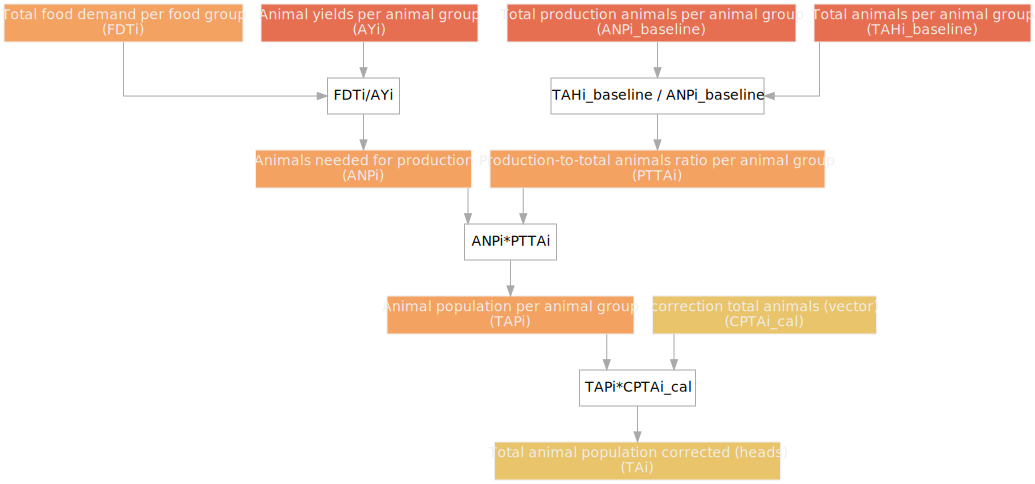

In [25]:
# These are the animal population groups that are used for the manure- and enteric emissions -> we need to aggregate to this from: ANPi & the Animal_group
# 'Other' contains: Horses, Asses and Mules; these animal populations are quite small & generally not eaten -> so assumed constant from the 2017 dataset

other_animals = [("Asses" + "Mules" + "Horse")]
Animal_group_emissions = ['Bovine meat', 'Pigmeat', 'Poultry meat',
                          'Eggs', 'Milk - Excluding Butter', 'Mutton & Goat meat']


# not sure if this works; but in this group (in ANPi_baseline) the eggs+meat should be added (in faostat ANPI doesn't have poultry meat and eggs seperated)
ANPi_group = ["Milk - Excluding Butter", 'Bovine meat',
              'Pigmeat', ('Poultry meat'+'Eggs'),  "Mutton & Goat meat"]
TAHi_group = ["Milk - Excluding Butter", "Bovine meat",
              "Pigmeat", "Poultry meat", "Mutton & Goat meat"]

# Milk &Bovine are aggregated into 'cattle' ; Asses, Mules and Horse into 'other'
Emission_groups = [("Milk - Excluding Butter" + "Bovine meat"), "Pigmeat",
                   "Poultry meat", "Mutton & Goat meat", ("Asses" + "Mules", "Horse")]

TAPi_nodes = [

    {'type': 'variable',
     'unit': '1000 t',
     'id': 'FDTi',
     'name': 'Total food demand per food group',

     },

    # add: "Sheep and Goat Meat" to AYi vector (value: 16.7) from: http://www.fao.org/faostat/en/#data/QL
    {'type': 'input',
     'unit': 'kg/animal',
     'id': 'AYi',
     'name': 'Animal yields per animal group',

     },
    {'type': 'variable',
     'unit': 'x1 million animals',
     'id': 'ANPi',
     'name': 'Animals needed for production',
     'in': ['FDTi', 'AYi'],
     'computation': {'name': 'FDTi/AYi',
                     'formula': lambda X: X['FDTi'].loc[Animal_group_emissions] / X['AYi'].loc[Animal_group_emissions]
                     }

     },
    # ANPI data from 2017 is used to calculate the PTTAi -> in JSON file this is still 'ANPi'
    # ADD: "Sheep and Goats" to JSON file for ANPi_baseline, value: 107764
    {'type': 'input',
     'unit': 'heads',
     'id': 'ANPi_baseline',
     'name': 'Total production animals per animal group',
     },


    # ADD: "Sheep and Goats" to JSON file for TAHi_baseline, value: 1222000
    {'type': 'input',
     'unit': 'heads',
     'id': 'TAHi_baseline',
     'name': 'Total animals per animal group',
     },


    {'type': 'variable',
     'unit': '',
     'id': 'PTTAi',
     'name': 'Production-to-total animals ratio per animal group',
     'in': ['TAHi_baseline', 'ANPi_baseline'],
     'computation': {'name': 'TAHi_baseline / ANPi_baseline',
                     'formula': lambda X: (X['TAHi_baseline'].loc[TAHi_group] / X['ANPi_baseline'].loc[ANPi_group])}
     },


    {'type': 'variable',
     'unit': 'heads',
     'id': 'TAPi',
     'name': 'Animal population per animal group',
     'in': ['ANPi', 'PTTAi'],
     'computation': {'name': 'ANPi*PTTAi',
                     'formula': lambda X: np.array([(X['ANPi'].loc[ANPi_group] * X['PTTAi'].loc[TAHi_group]), sum(X['TAHi_baseline'].loc[other_animals])])}
     },



    # the data on FAOstat did not match 100% so a small correction was used (still need to check why this difference emerges)  --> calculated using 2017 input data & comparing it with FAO data
    {'type': 'parameter',
     'unit': '',
     'id': 'CPTAi_cal',
     'name': 'correction total animals (vector)',
     },


    {'type': 'parameter',
     'unit': 'heads',
     'id': 'TAi',
     'name': 'Total animal population corrected (heads)',
     'in': ['CPTAi_cal', 'TAPi'],
     'computation': {'name': 'TAPi*CPTAi_cal',
                     'formula': lambda X: X['TAPi'] * X['CPTAi_cal']}
     },





]

model_TAPi = GraphModel(TAPi_nodes)

model_TAPi.draw()


# Experiment on refactoring graphs

In [42]:
def merge_nodes(nodes, node_type, name='', unit=''):
    nodes_id = [node['id'] for node in nodes]
    merged_node = {}
    merged_node['id'] = ', '.join(nodes_id)
    merged_node['name'] = name
    merged_node['type'] = node_type
    merged_node['unit'] = unit
    return merged_node

def contract_model(model):
    inputs_node = merge_nodes([node for node in model.graph_specifications if node['type'] in ['input']], 'input')
    parameter_nodes = merge_nodes([node for node in model.graph_specifications if node['type'] in ['parameter']], 'parameter')
    
    output_nodes = merge_nodes([node for node in model.graph_specifications if node['type'] in ['output']], 'output')
    output_nodes['in'] = [inputs_node['id'], parameter_nodes['id']]
    
    output_nodes['computation'] = {'name': output_nodes['id'] + ' Computation',
                                   'formula': lambda X: model.model_function(X)[output_nodes['id']]}

    return GraphModel([inputs_node, parameter_nodes, output_nodes])

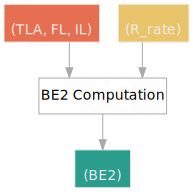

In [43]:
contract_model(model_BE2).draw()

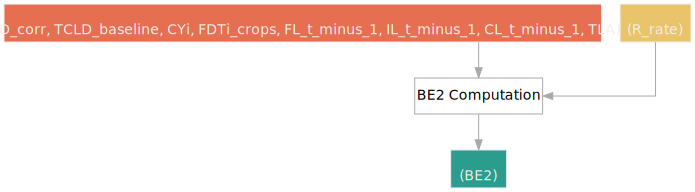

In [44]:
contract_model(model_full_BE2).draw()

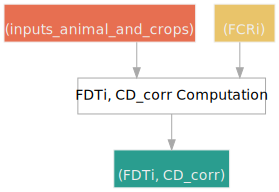

In [45]:
contract_model(GraphModel(full_FDTi_CD_corr_nodes)).draw()

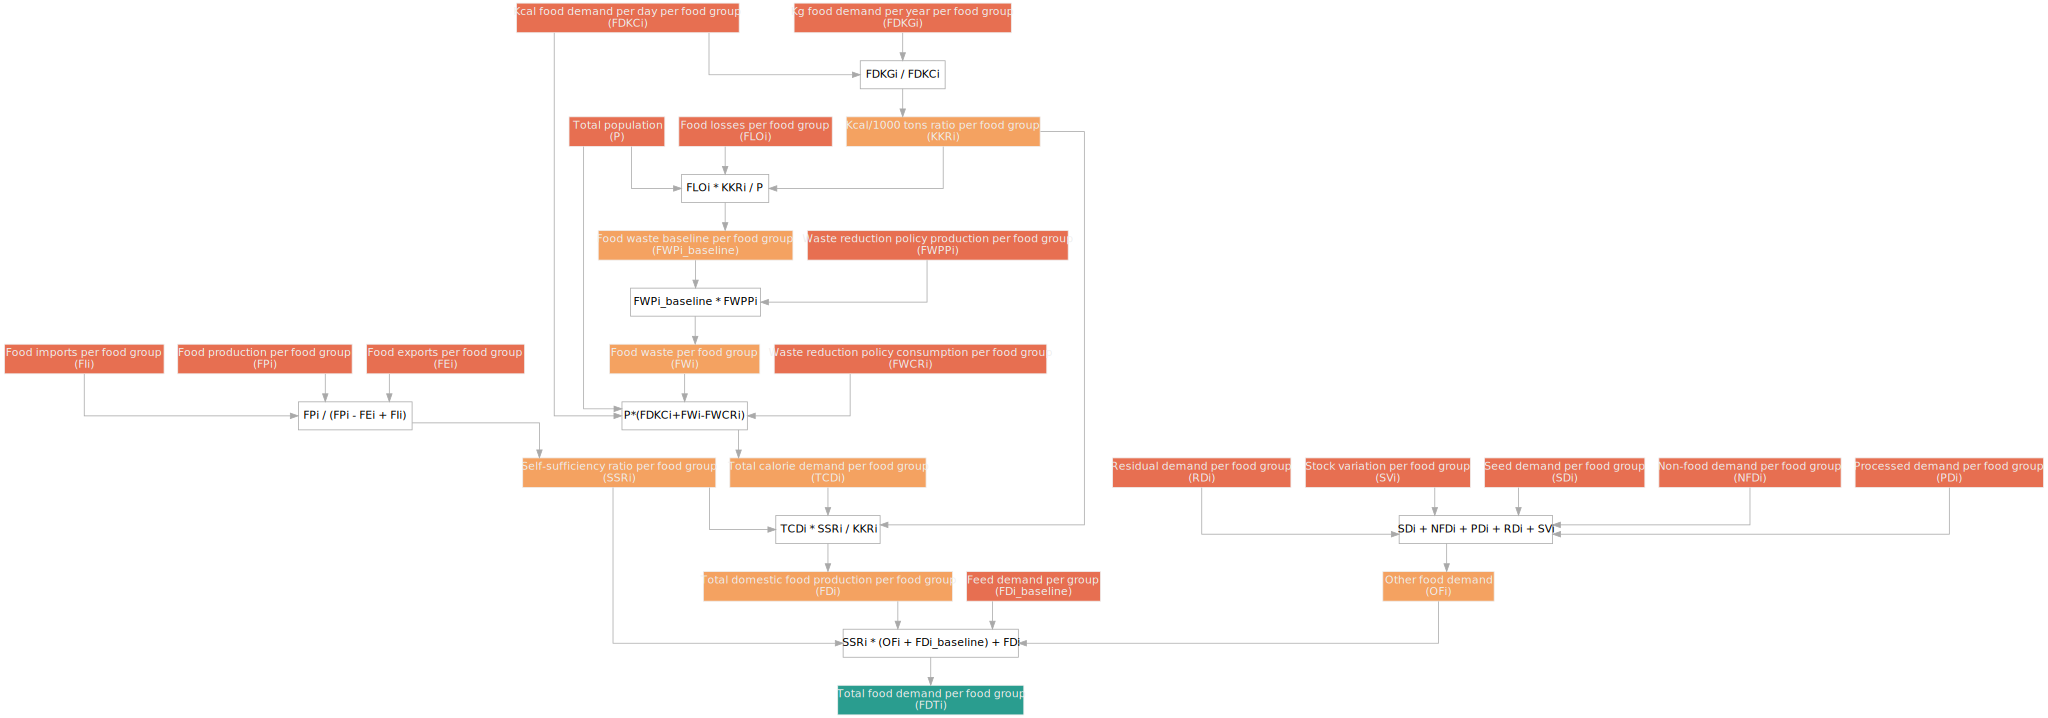

In [46]:
TDFi_model.draw()

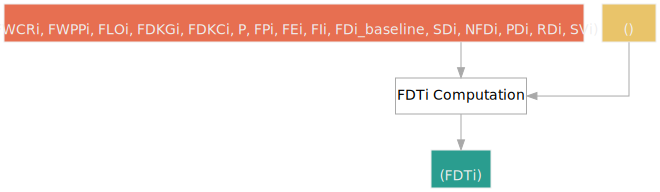

In [208]:

contract_model(TDFi_model).draw()